# Ejercicio – Simulación Monte Carlo

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np

### La definición de un modelo determinístico de un cálculo de costos:
### presupuesto simple con ítems, suma uno a uno. 

In [3]:
# Usaré la simulación de Monte Carlo para hacer la estimación de los costos asociados a un proyecto de investigación.
# Los costos de dicho proyecto son los siguientes:

# 1. Personal Profesional. (Asesores externos, digitadores y analistas de datos)
# 2. Encuestadores *
# 3. Bienes y servicios tecnológicos. (wifi, licencias informáticas)
# 4. Material de escritorio. (impresora, material de papeleria)
# 5. Biáticos. (de los encuestadores) *
# 6. Transporte. (de los encuestadores) *
# 7. Imprevistos. 

# Los costos en asterico representan los costos con una mayor variabilidad.

# El costo de referencia es de $11125

costo_referencia = 11125

### Definición de distribuciones de probabilidad a las variables del modelo

#### Primera simulación

In [16]:
# Variables del presupuesto
# Para la primera simulación utilizaré la siguientes distribuciones de probabilidad
# para modelar los costos. Este escenario representa el mejor de los 
# escenarios. En la segunda simulación cambiaré la función de distribución de 
# probabilidad de las variables costo_encuestadores, costo_transporte y costo_biaticos
# por una función beta con parámetros que simulan una inclinación de la curva hacia
# la derecha describiendo un incremento en la media de dichos costos. En síntesis, 
# la segunda versión representa un escenario pesimista ya que adiciona un factor de
# incertidumbre a aquellos costos que tienen una mayor variabilidad. 

def roll_dice():
    costo_personalProfesional= np.random.triangular(1400, 4000, 5000)
    costo_encuestadores = np.random.normal(3000, 300)
    costo_bienesTecnologicos=np.random.triangular(300, 1200, 2000)
    costo_materialOficina=np.random.normal(700, 100)
    costo_biaticos=np.random.normal(700, 100)
    costo_transporte=np.random.normal(200, 50)
    costo_imprevisto= np.random.uniform(100,200)

    return costo_personalProfesional, costo_encuestadores, costo_bienesTecnologicos, costo_materialOficina, costo_biaticos, costo_transporte, costo_imprevisto

### Ejecución de simulación aplicada al modelo con 5000 iteraciones

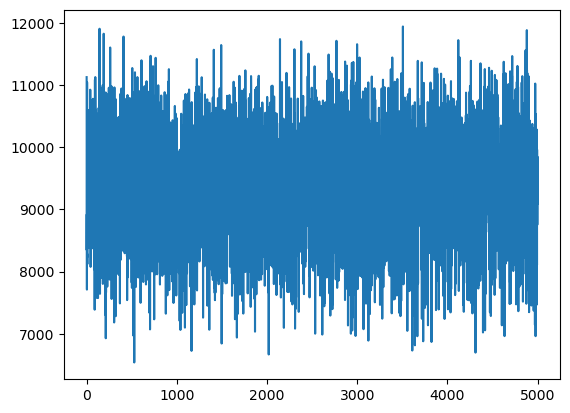

In [5]:
# Variable de configuracion
num_simulations = 5000
max_num_rolls = 5000


# Consideraré como balance inicial 11125. 

for i in range(num_simulations):
    balance=[11125]
    num_rolls=[0]
    #corre las 5000 veces
    while num_rolls[-1]<max_num_rolls:
        iter=roll_dice()
        # Obtiene el costo total
        costo_total = iter[0]+iter[1]+iter[2]+iter[3]+iter[4]+iter[5]+iter[6]
        balance.append(costo_total)
        num_rolls.append(num_rolls[-1]+1)
#Plotea las muestras del balance
plt.plot(num_rolls, balance)

### Visualización básica, lectura e interpretación de los resultados

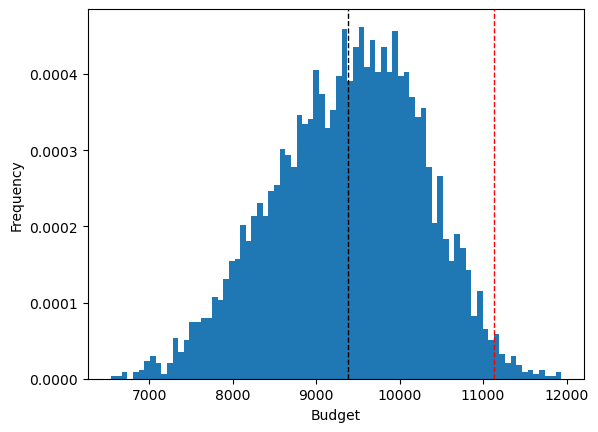

In [6]:
# Genera el histograma del balance
np.random.seed(42)
plt.hist(balance, density=True, bins=80) #desnsity= False would make counts
plt.ylabel('Frequency')
plt.xlabel('Budget')
plt.axvline(np.mean(balance),color='k', linestyle='dashed',linewidth=1)
plt.axvline(costo_referencia,color='r',linestyle='dashed',linewidth=1)

In [7]:
# Probabilidad de que sea un total menor al costo de referencia
costo_ok=[x for x in balance if x<costo_referencia]
num_costo_ok = costo_ok.__len__()
total_muestras=balance.__len__()
prob_costo_ref = num_costo_ok /total_muestras
print(f'La probabilidad de que el costo sea menor al costo de referencia es: {prob_costo_ref*100:.2f}%')

La probabilidad de que el costo sea menor al costo de referencia es: 98.50%


In [17]:
# La simulación del costo total a partir de las correspondientes
# funciones de densidad de probabilidad de cada costo muestra que
# el costo de referencia cubre casi el 100% del costo estimado. Sin
# embargo, como fue mencionado en el inicio, es importante realizar una
# segunda estimación que muestre en un modo más claro la incertidumbre
# de aquellos costos que tienen una mayor variabilidad para ver si al mismo
# costo de referencia el análisis de riesgo arroja los mismos resultados.

#### Segunda simulación

In [8]:
# Variable de configuracion
num_simulations = 5000
max_num_rolls = 5000
costo_referencia = 11125

# Variables del presupuesto
# Para esta simulación cambié la función de distribucion de probabilidad
# de las variables con mayor variabilidad: costo_encuestadores
# costo_biaticos y costo_transporte

def roll_dice():
    costo_personalProfesional= np.random.triangular(1400, 4000, 5000)
    costo_encuestadores = (np.random.beta(6,4))*3000
    costo_bienesTecnologicos=np.random.triangular(300, 1200, 2000)
    costo_materialOficina=np.random.normal(700, 100)
    costo_biaticos=(np.random.normal(7, 3))*700
    costo_transporte=(np.random.normal(7, 3))*200
    costo_imprevisto= np.random.uniform(100,200)

    return costo_personalProfesional, costo_encuestadores, costo_bienesTecnologicos, costo_materialOficina, costo_biaticos, costo_transporte, costo_imprevisto

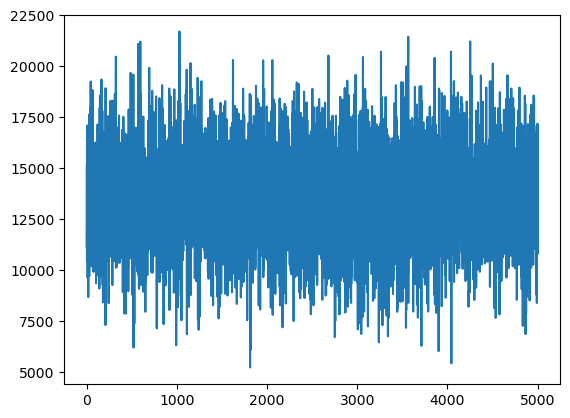

In [9]:
# Consideraré como balance inicial 11125. 

for i in range(num_simulations):
    balance2=[11125]
    num_rolls=[0]
    #corre las 5000 veces
    while num_rolls[-1]<max_num_rolls:
        iter=roll_dice()
        # Obtiene el costo total
        costo_total = iter[0]+iter[1]+iter[2]+iter[3]+iter[4]+iter[5]+iter[6]
        balance2.append(costo_total)
        num_rolls.append(num_rolls[-1]+1)
#Plotea las muestras del balance
plt.plot(num_rolls, balance2)

### Visualización básica, lectura e interpretación de los resultados

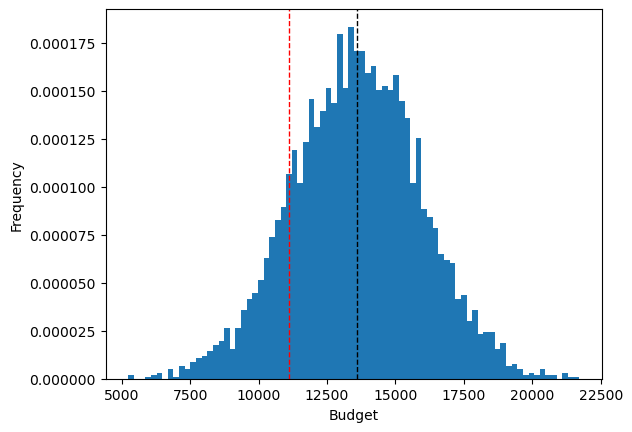

In [10]:
# Genera el histograma del balance
np.random.seed(42)
plt.hist(balance2, density=True, bins=80) #desnsity= False would make counts
plt.ylabel('Frequency')
plt.xlabel('Budget')
plt.axvline(np.mean(balance2),color='k', linestyle='dashed',linewidth=1)
plt.axvline(costo_referencia,color='r',linestyle='dashed',linewidth=1)

In [12]:
# Probabilidad de que sea un total menor al costo de referencia
costo_ok=[x for x in balance2 if x<costo_referencia]
num_costo_ok = costo_ok.__len__()
total_muestras=balance2.__len__()
prob_costo_ref = num_costo_ok /total_muestras
print(f'La probabilidad de que el costo sea menor al costo de referencia es: {prob_costo_ref*100:.2f}%')

La probabilidad de que el costo sea menor al costo de referencia es: 14.92%


In [14]:
# Al cambiar la función de distribución de probabilidad de 3 variables se vé un notorio
# cambio en el resultado final, ya que para este escenario el costo de referencia
# solo consigue cubrir el 15% del costo total.

### Conclusiones finales

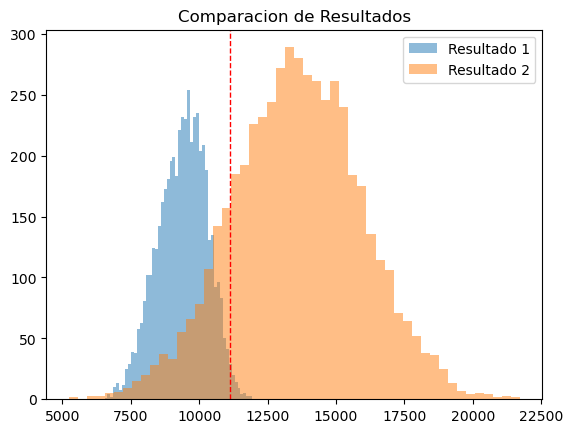

In [13]:
plt.hist(balance, bins=50, alpha=0.5, label='Resultado 1')
plt.hist(balance2, bins=50, alpha=0.5, label='Resultado 2')
plt.legend(loc='upper right')
plt.title('Comparacion de Resultados')
plt.axvline(costo_referencia, color='r', linestyle='dashed',linewidth=1)
plt.show()

In [15]:
# En el gráfico anterior se puede ver  el histograma de las dos simulaciones
# de monte carlo. Llama la atención el hecho de que al hacer un cambio en las 
# funciones de distribución de probabilidad (con parametros 
# que generen un cambio en las mimas) se ve en practica un gran cambio ya que se
# pasa de una cobertura del 98% al 15% del total de los costos estimados.
# Rescato el hecho de tener muy claro la función de distribución de probabilidad
# con los parametros indicados, ya que como se vió en este caso una diferencia
# en los mismos puede generar una gran diferencia en el resultado final.  